In [1]:
!pip install pandas tensorflow

In [7]:
import pandas as pd
import time
import datetime

In [3]:
tr_raw = pd.read_csv("../dataset/CH22_Demand_XY_Train.csv")

In [4]:
tr_raw

DateTime        X1     X2      X3      X4             Y
0      2022-01-01 00:00:00  2.186333  13.76  0.0663  0.1547  521163.83540
1      2022-01-01 00:10:00  2.138000  13.90  0.0910  0.1105  449066.62018
2      2022-01-01 00:20:00  2.104333  13.90  0.0806  0.1300  437394.72159
3      2022-01-01 00:30:00  2.040333  14.00  0.1183  0.1248  422107.63292
4      2022-01-01 00:40:00  1.973667  14.14  0.0624  0.1105  406923.83540
...                    ...       ...    ...     ...     ...           ...
41927  2022-10-19 03:50:00  5.856667  17.66  0.1092  0.1391  365929.91028
41928  2022-10-19 04:00:00  5.860000  17.66  0.1183  0.1495  368822.51417
41929  2022-10-19 04:10:00  5.846667  17.68  0.1001  0.1976  373857.78769
41930  2022-10-19 04:20:00  5.856667  17.66  0.1183  0.1391  373536.38739
41931  2022-10-19 04:30:00  5.876667  17.68  0.0767  0.1690  376643.25826

[41932 rows x 6 columns]

In [109]:
maincols = ["X1", "X2", "X3", "X4", "Y"]

In [5]:
tr_raw["DateTime"]

0        2022-01-01 00:00:00
1        2022-01-01 00:10:00
2        2022-01-01 00:20:00
3        2022-01-01 00:30:00
4        2022-01-01 00:40:00
                ...         
41927    2022-10-19 03:50:00
41928    2022-10-19 04:00:00
41929    2022-10-19 04:10:00
41930    2022-10-19 04:20:00
41931    2022-10-19 04:30:00
Name: DateTime, Length: 41932, dtype: object

In [6]:
demotime = tr_raw["DateTime"][0]

In [8]:
tr_raw["DateTime"] = pd.to_datetime(tr_raw["DateTime"], format="%Y-%m-%d %H:%M:%S")

In [9]:
tr_raw

DateTime        X1     X2      X3      X4             Y
0     2022-01-01 00:00:00  2.186333  13.76  0.0663  0.1547  521163.83540
1     2022-01-01 00:10:00  2.138000  13.90  0.0910  0.1105  449066.62018
2     2022-01-01 00:20:00  2.104333  13.90  0.0806  0.1300  437394.72159
3     2022-01-01 00:30:00  2.040333  14.00  0.1183  0.1248  422107.63292
4     2022-01-01 00:40:00  1.973667  14.14  0.0624  0.1105  406923.83540
...                   ...       ...    ...     ...     ...           ...
41927 2022-10-19 03:50:00  5.856667  17.66  0.1092  0.1391  365929.91028
41928 2022-10-19 04:00:00  5.860000  17.66  0.1183  0.1495  368822.51417
41929 2022-10-19 04:10:00  5.846667  17.68  0.1001  0.1976  373857.78769
41930 2022-10-19 04:20:00  5.856667  17.66  0.1183  0.1391  373536.38739
41931 2022-10-19 04:30:00  5.876667  17.68  0.0767  0.1690  376643.25826

[41932 rows x 6 columns]

In [10]:
tr_raw.dtypes

DateTime    datetime64[ns]
X1                 float64
X2                 float64
X3                 float64
X4                 float64
Y                  float64
dtype: object

In [99]:
tr_raw["doy"] = tr_raw["DateTime"].dt.dayofyear
tr_raw["time"] = tr_raw["DateTime"].dt.hour + tr_raw["DateTime"].dt.minute/60
tr_raw["hour"] = tr_raw["DateTime"].dt.hour
tr_raw["dow"] = tr_raw["DateTime"].dt.dayofweek
tr_raw["week"] = tr_raw["DateTime"].dt.isocalendar().week % 52
tr_raw["month"] = tr_raw["DateTime"].dt.month
tr_raw["day"] = tr_raw["DateTime"].dt.day

In [100]:
tr_raw[tr_raw['week'] < 52]

DateTime        X1     X2      X3      X4             Y  doy  \
0     2022-01-01 00:00:00  2.186333  13.76  0.0663  0.1547  521163.83540    1   
1     2022-01-01 00:10:00  2.138000  13.90  0.0910  0.1105  449066.62018    1   
2     2022-01-01 00:20:00  2.104333  13.90  0.0806  0.1300  437394.72159    1   
3     2022-01-01 00:30:00  2.040333  14.00  0.1183  0.1248  422107.63292    1   
4     2022-01-01 00:40:00  1.973667  14.14  0.0624  0.1105  406923.83540    1   
...                   ...       ...    ...     ...     ...           ...  ...   
41927 2022-10-19 03:50:00  5.856667  17.66  0.1092  0.1391  365929.91028  292   
41928 2022-10-19 04:00:00  5.860000  17.66  0.1183  0.1495  368822.51417  292   
41929 2022-10-19 04:10:00  5.846667  17.68  0.1001  0.1976  373857.78769  292   
41930 2022-10-19 04:20:00  5.856667  17.66  0.1183  0.1391  373536.38739  292   
41931 2022-10-19 04:30:00  5.876667  17.68  0.0767  0.1690  376643.25826  292   

           time  hour  dow  week  month  day  
0      0.000000     0    5     0      1    1  
1      0.166667     0    5     0      1    1  
2      0.333333     0    5     0      1    1  
3      0.500000     0    5     0      1    1  
4      0.666667     0    5     0      1    1  
...         ...   ...  ...   ...    ...  ...  
41927  3.833333     3    2    42     10   19  
41928  4.000000     4    2    42     10   19  
41929  4.166667     4    2    42     10   19  
41930  4.333333     4    2    42     10   19  
41931  4.500000     4    2    42     10   19  

[41932 rows x 13 columns]

In [123]:
means = tr_raw[maincols].mean()
stds = tr_raw[maincols].std()

In [124]:
for col in maincols:
    newcol = col + "m"
    tr_raw[newcol] = (tr_raw[col] - means[col]) / stds[col]

In [125]:
tr_raw

DateTime        X1     X2      X3      X4             Y  doy  \
0     2022-01-01 00:00:00  2.186333  13.76  0.0663  0.1547  521163.83540    1   
1     2022-01-01 00:10:00  2.138000  13.90  0.0910  0.1105  449066.62018    1   
2     2022-01-01 00:20:00  2.104333  13.90  0.0806  0.1300  437394.72159    1   
3     2022-01-01 00:30:00  2.040333  14.00  0.1183  0.1248  422107.63292    1   
4     2022-01-01 00:40:00  1.973667  14.14  0.0624  0.1105  406923.83540    1   
...                   ...       ...    ...     ...     ...           ...  ...   
41927 2022-10-19 03:50:00  5.856667  17.66  0.1092  0.1391  365929.91028  292   
41928 2022-10-19 04:00:00  5.860000  17.66  0.1183  0.1495  368822.51417  292   
41929 2022-10-19 04:10:00  5.846667  17.68  0.1001  0.1976  373857.78769  292   
41930 2022-10-19 04:20:00  5.856667  17.66  0.1183  0.1391  373536.38739  292   
41931 2022-10-19 04:30:00  5.876667  17.68  0.0767  0.1690  376643.25826  292   

           time  hour  dow  week  month  day       X1m       X2m       X3m  \
0      0.000000     0    5     0      1    1 -2.185974  0.383263 -0.718616   
1      0.166667     0    5     0      1    1 -2.210354  0.426842 -0.718548   
2      0.333333     0    5     0      1    1 -2.227336  0.426842 -0.718577   
3      0.500000     0    5     0      1    1 -2.259618  0.457970 -0.718473   
4      0.666667     0    5     0      1    1 -2.293245  0.501548 -0.718627   
...         ...   ...  ...   ...    ...  ...       ...       ...       ...   
41927  3.833333     3    2    42     10   19 -0.334611  1.597241 -0.718498   
41928  4.000000     4    2    42     10   19 -0.332929  1.597241 -0.718473   
41929  4.166667     4    2    42     10   19 -0.339655  1.603467 -0.718523   
41930  4.333333     4    2    42     10   19 -0.334611  1.597241 -0.718473   
41931  4.500000     4    2    42     10   19 -0.324522  1.603467 -0.718587   

            X4m        Ym  
0     -0.627580  0.138099  
1     -0.627841 -0.453112  
2     -0.627726 -0.548824  
3     -0.627757 -0.674181  
4     -0.627841 -0.798692  
...         ...       ...  
41927 -0.627672 -1.134850  
41928 -0.627610 -1.111130  
41929 -0.627326 -1.069840  
41930 -0.627672 -1.072475  
41931 -0.627495 -1.046998  

[41932 rows x 18 columns]

In [126]:
tr_raw.groupby("time").mean()

X1         X2        X3        X4              Y    doy  \
time                                                                       
0.000000   6.054942  13.678767  0.082866  0.155684  500706.529194  146.5   
0.166667   6.036144  13.713336  0.083565  0.157389  489099.640085  146.5   
0.333333   6.023566  13.743068  0.083400  0.158293  478178.239060  146.5   
0.500000   6.006801  13.778685  0.083187  0.158084  467519.879036  146.5   
0.666667   5.991132  13.807986  0.082826  0.157042  458002.170318  146.5   
...             ...        ...       ...       ...            ...    ...   
23.166667  6.157005  13.511931  0.084098  0.150970  569110.210024  146.0   
23.333333  6.142277  13.540845  0.082919  0.152877  554796.007880  146.0   
23.500000  6.126494  13.569918  0.083321  0.155674  540444.770129  146.0   
23.666667  6.108410  13.595670  0.083307  0.156670  526934.720079  146.0   
23.833333  6.090897  13.638027  0.084009  0.156608  513928.243238  146.0   

           hour       dow       week     month        day       X1m       X2m  \
time                                                                            
0.000000    0.0  2.996575  21.071918  5.342466  15.311644 -0.234598  0.357977   
0.166667    0.0  2.996575  21.071918  5.342466  15.311644 -0.244080  0.368738   
0.333333    0.0  2.996575  21.071918  5.342466  15.311644 -0.250424  0.377993   
0.500000    0.0  2.996575  21.071918  5.342466  15.311644 -0.258881  0.389080   
0.666667    0.0  2.996575  21.071918  5.342466  15.311644 -0.266784  0.398200   
...         ...       ...        ...       ...        ...       ...       ...   
23.166667  23.0  3.000000       21.0  5.326460  15.298969 -0.183116  0.306045   
23.333333  23.0  3.000000       21.0  5.326460  15.298969 -0.190545  0.315046   
23.500000  23.0  3.000000       21.0  5.326460  15.298969 -0.198506  0.324095   
23.666667  23.0  3.000000       21.0  5.326460  15.298969 -0.207628  0.332111   
23.833333  23.0  3.000000       21.0  5.326460  15.298969 -0.216462  0.345296   

                X3m       X4m        Ym  
time                                     
0.000000  -0.718570 -0.627574 -0.029655  
0.166667  -0.718568 -0.627564 -0.124833  
0.333333  -0.718569 -0.627558 -0.214391  
0.500000  -0.718569 -0.627560 -0.301792  
0.666667  -0.718570 -0.627566 -0.379839  
...             ...       ...       ...  
23.166667 -0.718567 -0.627602  0.531269  
23.333333 -0.718570 -0.627590  0.413890  
23.500000 -0.718569 -0.627574  0.296207  
23.666667 -0.718569 -0.627568  0.185422  
23.833333 -0.718567 -0.627568  0.078766  

[144 rows x 16 columns]

# DAILY TRENDS

Average trends with the interval of a single day, based on the HH:MM time of day

In [127]:
daily = tr_raw.groupby("time").mean()

In [128]:
# means.drop(columns=["Y", "DayOfYear"]).plot()

<AxesSubplot:xlabel='time'>

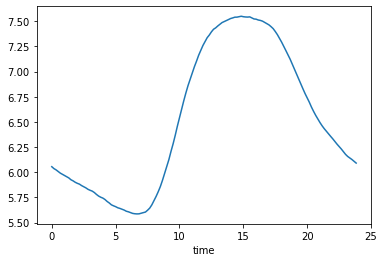

In [129]:
daily["X1"].plot()

<AxesSubplot:xlabel='time'>

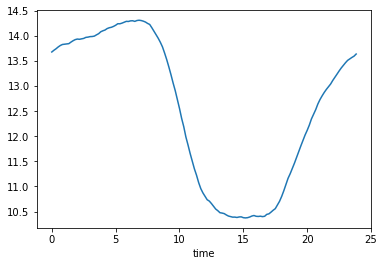

In [130]:
daily["X2"].plot()

<AxesSubplot:xlabel='time'>

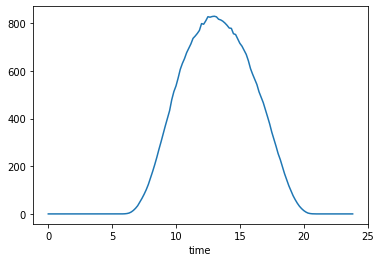

In [131]:
daily["X3"].plot()

<AxesSubplot:xlabel='time'>

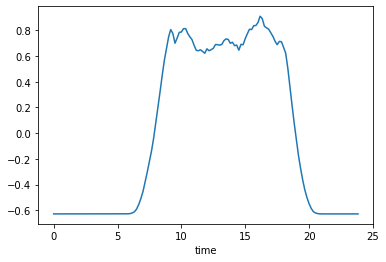

In [136]:
daily["X4m"].plot()

<AxesSubplot:xlabel='time'>

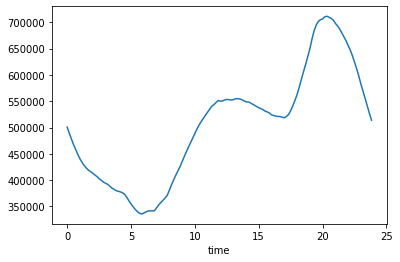

In [133]:
daily["Y"].plot()

# YEARLY TRENDS

Trends across the entire year, average for the day of the year

In [137]:
trend = tr_raw.groupby("doy").mean()

<AxesSubplot:xlabel='doy'>

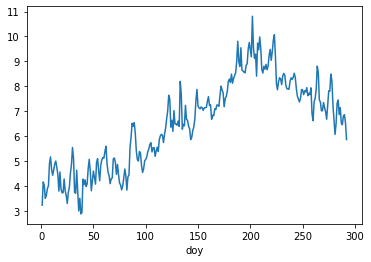

In [138]:
trend["X1"].plot()

<AxesSubplot:xlabel='doy'>

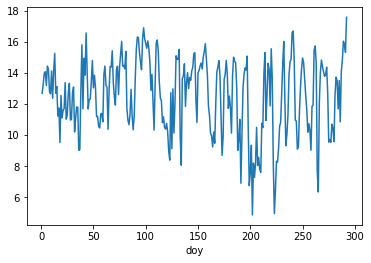

In [139]:
trend["X2"].plot()

<AxesSubplot:xlabel='doy'>

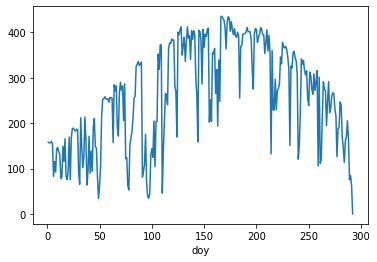

In [140]:
trend["X3"].plot()

<AxesSubplot:xlabel='doy'>

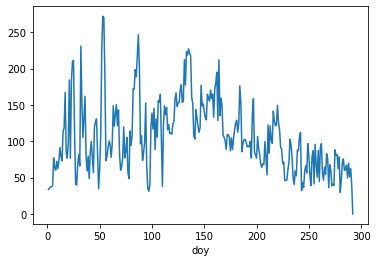

In [141]:
trend["X4"].plot()

<AxesSubplot:xlabel='doy'>

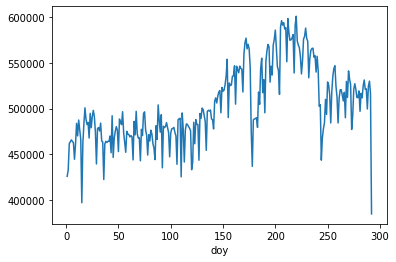

In [142]:
trend["Y"].plot()

# WEEKLY TRENDS

Trends over a week, averaged for all data

## Hour-based weekly trends

In [143]:
weekly = tr_raw.groupby(["dow", "hour"]).mean()

In [144]:
weekly

X1         X2         X3         X4              Y    doy  \
dow hour                                                                    
0   0     6.028135  13.996635   0.081833   0.153137  468016.245956  146.5   
    1     5.938505  14.135563   0.079960   0.162299  422660.478394  146.5   
    2     5.863336  14.167016   0.080244   0.163222  402462.725365  146.5   
    3     5.770487  14.435024   0.080507   0.159668  386011.631278  146.5   
    4     5.701333  14.589159   0.081271   0.162319  372216.377839  146.5   
...            ...        ...        ...        ...            ...    ...   
6   19    6.903730  11.800294  52.209893  52.828714  689666.416773  145.5   
    20    6.643016  12.452317   4.408677   4.087716  713277.511700  145.5   
    21    6.436045  12.890603   0.088673   0.141298  683457.945183  145.5   
    22    6.284325  13.297238   0.086373   0.147792  624930.013709  145.5   
    23    6.139603  13.657254   0.081905   0.152915  541467.885904  145.5   

               time  week     month        day       X1m       X2m       X3m  \
dow hour                                                                       
0   0      0.416667  21.5  5.333333  15.571429 -0.248120  0.456922 -0.718573   
    1      1.416667  21.5  5.333333  15.571429 -0.293330  0.500167 -0.718578   
    2      2.416667  21.5  5.333333  15.571429 -0.331247  0.509958 -0.718578   
    3      3.416667  21.5  5.333333  15.571429 -0.378081  0.593382 -0.718577   
    4      4.416667  21.5  5.333333  15.571429 -0.412963  0.641361 -0.718575   
...             ...   ...       ...        ...       ...       ...       ...   
6   19    19.416667  20.5  5.309524  15.309524  0.193542 -0.226747 -0.575248   
    20    20.416667  20.5  5.309524  15.309524  0.062034 -0.023787 -0.706677   
    21    21.416667  20.5  5.309524  15.309524 -0.042365  0.112641 -0.718554   
    22    22.416667  20.5  5.309524  15.309524 -0.118894  0.239217 -0.718561   
    23    23.416667  20.5  5.309524  15.309524 -0.191894  0.351281 -0.718573   

               X4m        Ym  
dow hour                      
0   0    -0.627589 -0.297722  
    1    -0.627535 -0.669648  
    2    -0.627529 -0.835274  
    3    -0.627550 -0.970176  
    4    -0.627535 -1.083300  
...            ...       ...  
6   19   -0.316032  1.519855  
    20   -0.604317  1.713470  
    21   -0.627659  1.468944  
    22   -0.627621  0.989003  
    23   -0.627590  0.304597  

[168 rows x 15 columns]

<AxesSubplot:xlabel='dow,hour'>

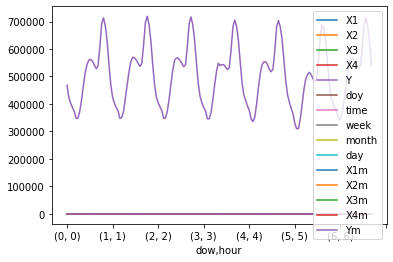

In [145]:
weekly.plot()

<AxesSubplot:xlabel='dow,hour'>

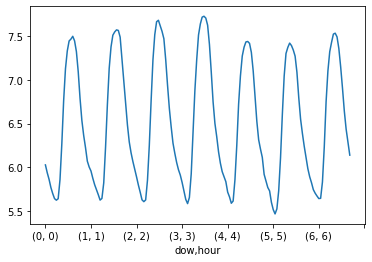

In [146]:
weekly["X1"].plot()

<AxesSubplot:xlabel='dow,hour'>

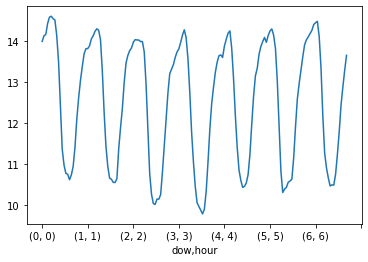

In [147]:
weekly["X2"].plot()

<AxesSubplot:xlabel='dow,hour'>

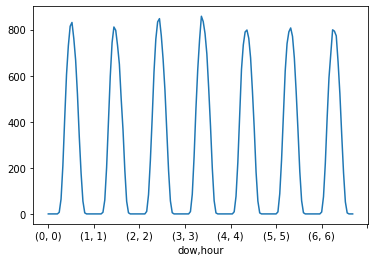

In [148]:
weekly["X3"].plot()

<AxesSubplot:xlabel='dow,hour'>

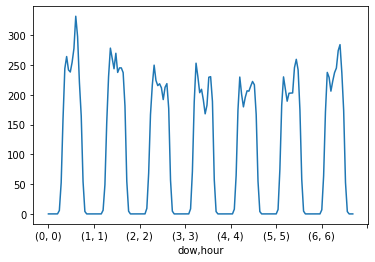

In [149]:
weekly["X4"].plot()

<AxesSubplot:xlabel='dow,hour'>

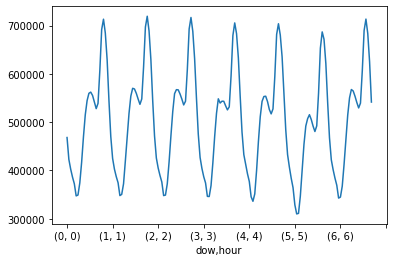

In [150]:
weekly["Y"].plot()

# Day-based weekly trends

In [151]:
weekdaily = tr_raw.groupby(["dow"]).mean()

<AxesSubplot:xlabel='dow'>

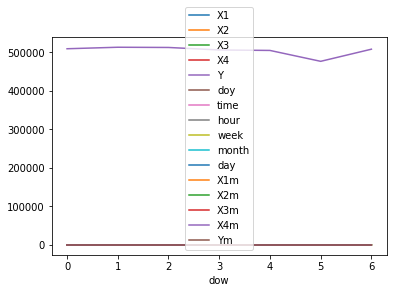

In [152]:
weekdaily.plot()

<AxesSubplot:xlabel='dow'>

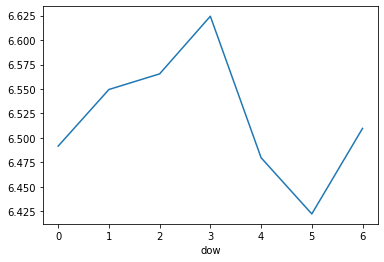

In [153]:
weekdaily["X1"].plot()

<AxesSubplot:xlabel='dow'>

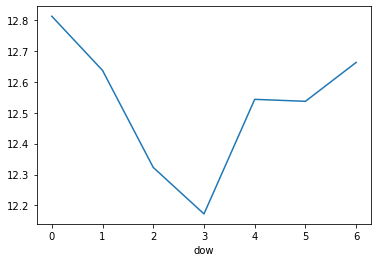

In [154]:
weekdaily["X2"].plot()

<AxesSubplot:xlabel='dow'>

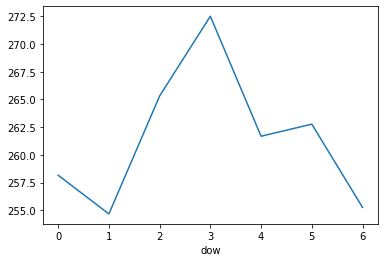

In [155]:
weekdaily["X3"].plot()

<AxesSubplot:xlabel='dow'>

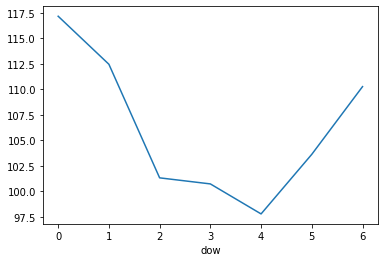

In [156]:
weekdaily["X4"].plot()

<AxesSubplot:xlabel='dow'>

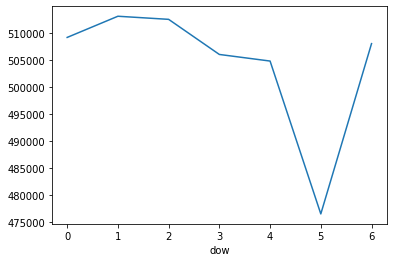

In [157]:
weekdaily["Y"].plot()

# MONTHLY TRENDS

In [158]:
tr_raw

DateTime        X1     X2      X3      X4             Y  doy  \
0     2022-01-01 00:00:00  2.186333  13.76  0.0663  0.1547  521163.83540    1   
1     2022-01-01 00:10:00  2.138000  13.90  0.0910  0.1105  449066.62018    1   
2     2022-01-01 00:20:00  2.104333  13.90  0.0806  0.1300  437394.72159    1   
3     2022-01-01 00:30:00  2.040333  14.00  0.1183  0.1248  422107.63292    1   
4     2022-01-01 00:40:00  1.973667  14.14  0.0624  0.1105  406923.83540    1   
...                   ...       ...    ...     ...     ...           ...  ...   
41927 2022-10-19 03:50:00  5.856667  17.66  0.1092  0.1391  365929.91028  292   
41928 2022-10-19 04:00:00  5.860000  17.66  0.1183  0.1495  368822.51417  292   
41929 2022-10-19 04:10:00  5.846667  17.68  0.1001  0.1976  373857.78769  292   
41930 2022-10-19 04:20:00  5.856667  17.66  0.1183  0.1391  373536.38739  292   
41931 2022-10-19 04:30:00  5.876667  17.68  0.0767  0.1690  376643.25826  292   

           time  hour  dow  week  month  day       X1m       X2m       X3m  \
0      0.000000     0    5     0      1    1 -2.185974  0.383263 -0.718616   
1      0.166667     0    5     0      1    1 -2.210354  0.426842 -0.718548   
2      0.333333     0    5     0      1    1 -2.227336  0.426842 -0.718577   
3      0.500000     0    5     0      1    1 -2.259618  0.457970 -0.718473   
4      0.666667     0    5     0      1    1 -2.293245  0.501548 -0.718627   
...         ...   ...  ...   ...    ...  ...       ...       ...       ...   
41927  3.833333     3    2    42     10   19 -0.334611  1.597241 -0.718498   
41928  4.000000     4    2    42     10   19 -0.332929  1.597241 -0.718473   
41929  4.166667     4    2    42     10   19 -0.339655  1.603467 -0.718523   
41930  4.333333     4    2    42     10   19 -0.334611  1.597241 -0.718473   
41931  4.500000     4    2    42     10   19 -0.324522  1.603467 -0.718587   

            X4m        Ym  
0     -0.627580  0.138099  
1     -0.627841 -0.453112  
2     -0.627726 -0.548824  
3     -0.627757 -0.674181  
4     -0.627841 -0.798692  
...         ...       ...  
41927 -0.627672 -1.134850  
41928 -0.627610 -1.111130  
41929 -0.627326 -1.069840  
41930 -0.627672 -1.072475  
41931 -0.627495 -1.046998  

[41932 rows x 18 columns]

In [159]:
monthly = tr_raw.groupby(["day", "hour"]).mean()

In [160]:
monthly

X1         X2         X3         X4              Y    doy  \
day hour                                                                    
1   0     5.733950  14.442800   0.080470   0.153010  470525.815927  137.0   
    1     5.648850  14.533933   0.079365   0.159467  420911.551161  137.0   
    2     5.582756  14.534900   0.083308   0.168328  398281.352702  137.0   
    3     5.506367  14.533300   0.077003   0.167505  378462.770124  137.0   
    4     5.396589  14.567667   0.077697   0.161958  364090.141632  137.0   
...            ...        ...        ...        ...            ...    ...   
31  19    7.166556  12.029733  60.263060  62.258343  695788.048903  145.4   
    20    6.941778  12.974200   4.828417   4.504457  717076.825229  145.4   
    21    6.642778  14.062333   0.094770   0.128873  696196.904218  145.4   
    22    6.478111  14.425533   0.087273   0.142783  649780.578881  145.4   
    23    6.405556  14.494267   0.083980   0.156087  571919.609739  145.4   

               time  dow  week  month       X1m       X2m       X3m       X4m  \
day hour                                                                        
1   0      0.416667  3.1  19.7    5.5 -0.396511  0.595803 -0.718577 -0.627590   
    1      1.416667  3.1  19.7    5.5 -0.439436  0.624171 -0.718580 -0.627551   
    2      2.416667  3.1  19.7    5.5 -0.472775  0.624471 -0.718569 -0.627499   
    3      3.416667  3.1  19.7    5.5 -0.511306  0.623973 -0.718586 -0.627504   
    4      4.416667  3.1  19.7    5.5 -0.566680  0.634671 -0.718585 -0.627537   
...             ...  ...   ...    ...       ...       ...       ...       ...   
31  19    19.416667  2.4  21.0    4.8  0.326114 -0.155328 -0.553106 -0.260259   
    20    20.416667  2.4  21.0    4.8  0.212733  0.138662 -0.705522 -0.601852   
    21    21.416667  2.4  21.0    4.8  0.061914  0.477373 -0.718538 -0.627732   
    22    22.416667  2.4  21.0    4.8 -0.021146  0.590428 -0.718558 -0.627650   
    23    23.416667  2.4  21.0    4.8 -0.057744  0.611823 -0.718567 -0.627571   

                Ym  
day hour            
1   0    -0.277143  
    1    -0.683990  
    2    -0.869562  
    3    -1.032078  
    4    -1.149937  
...            ...  
31  19    1.570053  
    20    1.744625  
    21    1.573406  
    22    1.192783  
    23    0.554307  

[744 rows x 15 columns]

<AxesSubplot:xlabel='day,hour'>

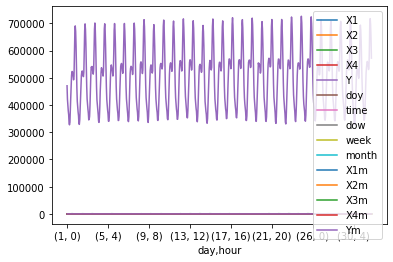

In [161]:
monthly.plot()

<AxesSubplot:xlabel='day,hour'>

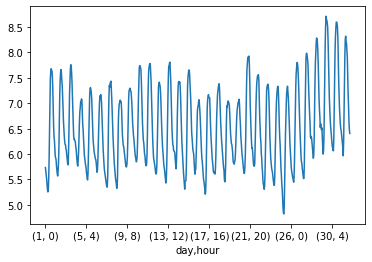

In [162]:
monthly["X1"].plot()

<AxesSubplot:xlabel='day,hour'>

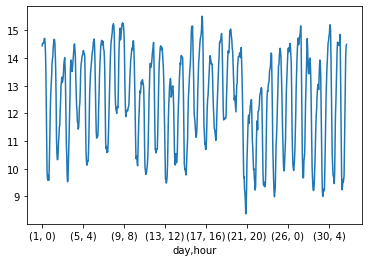

In [163]:
monthly["X2"].plot()

<AxesSubplot:xlabel='day,hour'>

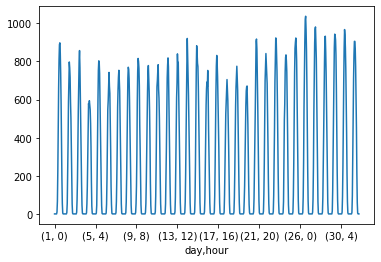

In [164]:
monthly["X3"].plot()

<AxesSubplot:xlabel='day,hour'>

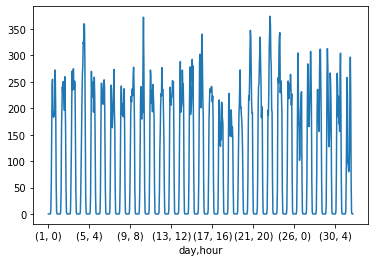

In [165]:
monthly["X4"].plot()

<AxesSubplot:xlabel='day,hour'>

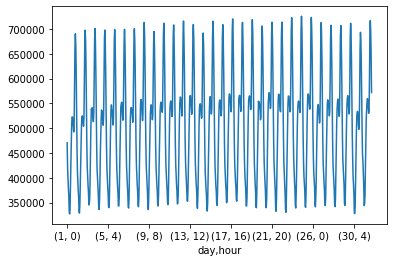

In [166]:
monthly["Y"].plot()

In [167]:
monthdaily = tr_raw.groupby(["day"]).mean()

In [168]:
monthdaily

X1         X2          X3          X4              Y         doy  \
day                                                                           
1    6.399971  12.475386  283.224442  100.641348  484292.457182  137.000000   
2    6.534237  12.658242  243.609768  102.576057  488549.460400  138.000000   
3    6.635391  12.295819  244.980808  107.505516  499139.697359  139.000000   
4    6.387987  13.062758  202.089301  121.885947  494117.214888  140.000000   
5    6.334089  12.502376  247.697569  104.219079  497005.584543  141.000000   
6    6.331854  13.157964  228.994327  103.516415  500350.468393  142.000000   
7    6.350340  12.832446  236.941983   97.387354  500385.269846  143.000000   
8    6.244598  13.845612  240.971284   96.434156  506339.279075  144.000000   
9    6.531685  13.494614  248.109660  104.361024  497098.123683  145.000000   
10   6.701282  12.560199  240.147354  106.719408  505381.093163  146.000000   
11   6.691942  11.779590  252.333576  108.863501  506210.781814  147.000000   
12   6.431266  12.739976  243.461530   96.914210  509244.165731  148.000000   
13   6.547095  12.217263  259.255499  106.963774  512457.945509  149.000000   
14   6.530090  11.885326  261.027644  106.208714  500035.290360  150.000000   
15   6.478944  12.126332  277.163572  111.373336  501888.284848  151.000000   
16   6.301426  13.139635  238.888611  120.452255  506738.454325  152.000000   
17   6.208301  13.044063  260.715771  107.143934  513952.865537  153.000000   
18   6.434898  12.729635  230.955153   87.987176  513360.740364  154.000000   
19   6.313802  13.371298  239.650924   85.290841  509325.114360  142.996979   
20   6.401235  13.701358  211.836001   90.981847  505389.370102  140.777778   
21   6.720949  11.571659  279.736768  119.177440  511082.449071  141.777778   
22   6.589805  11.112474  270.687486  119.971447  510039.618147  142.777778   
23   6.294581  11.404543  292.035736  130.253150  509550.101316  143.777778   
24   6.251845  11.805898  275.945940  123.461551  511917.925015  144.777778   
25   6.116061  12.470944  306.436168  113.354092  514940.347142  145.777778   
26   6.559885  12.616509  328.704009   96.357363  503409.093843  146.777778   
27   6.703515  12.855080  311.424490  110.732013  506623.689870  147.777778   
28   7.029895  11.761377  285.461429  109.557605  505613.468057  148.777778   
29   7.319239  11.666217  314.022741  106.554122  510880.914124  161.000000   
30   7.250396  12.557950  301.815531  106.013455  492156.055216  162.000000   
31   7.044926  12.478483  306.143143   84.333475  515238.368766  145.400000   

          time       hour       dow       week    month       X1m       X2m  \
day                                                                           
1    11.916667  11.500000  3.100000       19.7  5.50000 -0.060561 -0.016607   
2    11.916667  11.500000  3.400000       19.8  5.50000  0.007164  0.040312   
3    11.916667  11.500000  3.000000       20.0  5.50000  0.058188 -0.072501   
4    11.916667  11.500000  2.600000       20.2  5.50000 -0.066606  0.166229   
5    11.916667  11.500000  2.900000       20.3  5.50000 -0.093793 -0.008205   
6    11.916667  11.500000  3.200000       20.4  5.50000 -0.094920  0.195864   
7    11.916667  11.500000  2.800000       20.6  5.50000 -0.085596  0.094538   
8    11.916667  11.500000  3.100000       20.7  5.50000 -0.138933  0.409913   
9    11.916667  11.500000  3.400000       20.8  5.50000  0.005877  0.300655   
10   11.916667  11.500000  3.000000       21.0  5.50000  0.091424  0.009794   
11   11.916667  11.500000  2.600000       21.2  5.50000  0.086713 -0.233191   
12   11.916667  11.500000  2.900000       21.3  5.50000 -0.044775  0.065754   
13   11.916667  11.500000  3.200000       21.4  5.50000  0.013650 -0.096954   
14   11.916667  11.500000  2.800000       21.6  5.50000  0.005073 -0.200278   
15   11.916667  11.500000  3.100000       21.7  5.50000 -0.020726 -0.125259   
16   11.916667  11.500000  3.400000       21.8  5.50000 -0.1

<AxesSubplot:xlabel='day'>

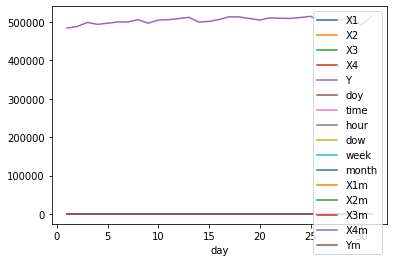

In [169]:
monthdaily.plot()

<AxesSubplot:xlabel='day'>

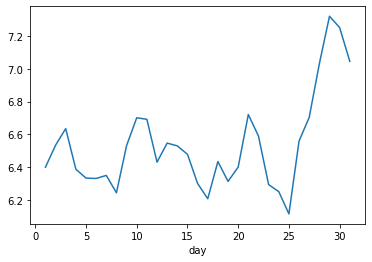

In [170]:
monthdaily["X1"].plot()

<AxesSubplot:xlabel='day'>

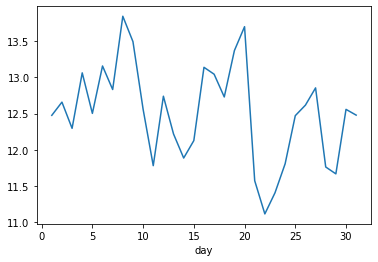

In [171]:
monthdaily["X2"].plot()

<AxesSubplot:xlabel='day'>

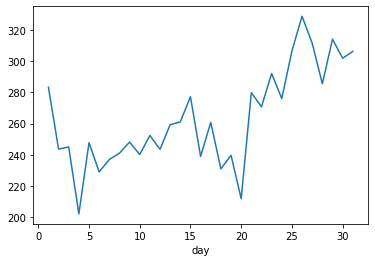

In [172]:
monthdaily["X3"].plot()

<AxesSubplot:xlabel='day'>

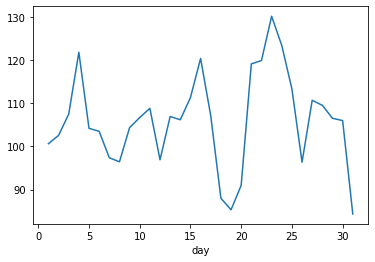

In [173]:
monthdaily["X4"].plot()

<AxesSubplot:xlabel='day'>

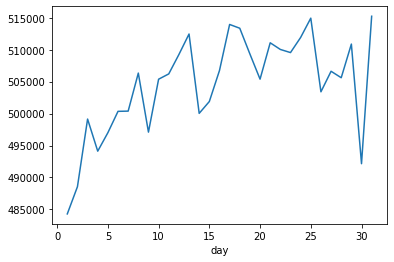

In [174]:
monthdaily["Y"].plot()

In [175]:
tr_raw

DateTime        X1     X2      X3      X4             Y  doy  \
0     2022-01-01 00:00:00  2.186333  13.76  0.0663  0.1547  521163.83540    1   
1     2022-01-01 00:10:00  2.138000  13.90  0.0910  0.1105  449066.62018    1   
2     2022-01-01 00:20:00  2.104333  13.90  0.0806  0.1300  437394.72159    1   
3     2022-01-01 00:30:00  2.040333  14.00  0.1183  0.1248  422107.63292    1   
4     2022-01-01 00:40:00  1.973667  14.14  0.0624  0.1105  406923.83540    1   
...                   ...       ...    ...     ...     ...           ...  ...   
41927 2022-10-19 03:50:00  5.856667  17.66  0.1092  0.1391  365929.91028  292   
41928 2022-10-19 04:00:00  5.860000  17.66  0.1183  0.1495  368822.51417  292   
41929 2022-10-19 04:10:00  5.846667  17.68  0.1001  0.1976  373857.78769  292   
41930 2022-10-19 04:20:00  5.856667  17.66  0.1183  0.1391  373536.38739  292   
41931 2022-10-19 04:30:00  5.876667  17.68  0.0767  0.1690  376643.25826  292   

           time  hour  dow  week  month  day       X1m       X2m       X3m  \
0      0.000000     0    5     0      1    1 -2.185974  0.383263 -0.718616   
1      0.166667     0    5     0      1    1 -2.210354  0.426842 -0.718548   
2      0.333333     0    5     0      1    1 -2.227336  0.426842 -0.718577   
3      0.500000     0    5     0      1    1 -2.259618  0.457970 -0.718473   
4      0.666667     0    5     0      1    1 -2.293245  0.501548 -0.718627   
...         ...   ...  ...   ...    ...  ...       ...       ...       ...   
41927  3.833333     3    2    42     10   19 -0.334611  1.597241 -0.718498   
41928  4.000000     4    2    42     10   19 -0.332929  1.597241 -0.718473   
41929  4.166667     4    2    42     10   19 -0.339655  1.603467 -0.718523   
41930  4.333333     4    2    42     10   19 -0.334611  1.597241 -0.718473   
41931  4.500000     4    2    42     10   19 -0.324522  1.603467 -0.718587   

            X4m        Ym  
0     -0.627580  0.138099  
1     -0.627841 -0.453112  
2     -0.627726 -0.548824  
3     -0.627757 -0.674181  
4     -0.627841 -0.798692  
...         ...       ...  
41927 -0.627672 -1.134850  
41928 -0.627610 -1.111130  
41929 -0.627326 -1.069840  
41930 -0.627672 -1.072475  
41931 -0.627495 -1.046998  

[41932 rows x 18 columns]

In [178]:
tr_raw.drop(columns=["DateTime"])

X1     X2      X3      X4             Y  doy      time  hour  \
0      2.186333  13.76  0.0663  0.1547  521163.83540    1  0.000000     0   
1      2.138000  13.90  0.0910  0.1105  449066.62018    1  0.166667     0   
2      2.104333  13.90  0.0806  0.1300  437394.72159    1  0.333333     0   
3      2.040333  14.00  0.1183  0.1248  422107.63292    1  0.500000     0   
4      1.973667  14.14  0.0624  0.1105  406923.83540    1  0.666667     0   
...         ...    ...     ...     ...           ...  ...       ...   ...   
41927  5.856667  17.66  0.1092  0.1391  365929.91028  292  3.833333     3   
41928  5.860000  17.66  0.1183  0.1495  368822.51417  292  4.000000     4   
41929  5.846667  17.68  0.1001  0.1976  373857.78769  292  4.166667     4   
41930  5.856667  17.66  0.1183  0.1391  373536.38739  292  4.333333     4   
41931  5.876667  17.68  0.0767  0.1690  376643.25826  292  4.500000     4   

       dow  week  month  day       X1m       X2m       X3m       X4m        Ym  
0        5     0      1    1 -2.185974  0.383263 -0.718616 -0.627580  0.138099  
1        5     0      1    1 -2.210354  0.426842 -0.718548 -0.627841 -0.453112  
2        5     0      1    1 -2.227336  0.426842 -0.718577 -0.627726 -0.548824  
3        5     0      1    1 -2.259618  0.457970 -0.718473 -0.627757 -0.674181  
4        5     0      1    1 -2.293245  0.501548 -0.718627 -0.627841 -0.798692  
...    ...   ...    ...  ...       ...       ...       ...       ...       ...  
41927    2    42     10   19 -0.334611  1.597241 -0.718498 -0.627672 -1.134850  
41928    2    42     10   19 -0.332929  1.597241 -0.718473 -0.627610 -1.111130  
41929    2    42     10   19 -0.339655  1.603467 -0.718523 -0.627326 -1.069840  
41930    2    42     10   19 -0.334611  1.597241 -0.718473 -0.627672 -1.072475  
41931    2    42     10   19 -0.324522  1.603467 -0.718587 -0.627495 -1.046998  

[41932 rows x 17 columns]

In [180]:
tr_raw.to_csv("../dataset/LSME-processed-train-01.csv")

In [182]:
ts_raw = pd.read_csv("../dataset/CH22_Demand_raw_X_Test.csv")
ts_raw["DateTime"] = pd.to_datetime(ts_raw["DateTime"], format="%Y-%m-%d %H:%M:%S")

In [183]:
ts_raw["doy"] = ts_raw["DateTime"].dt.dayofyear
ts_raw["time"] = ts_raw["DateTime"].dt.hour + ts_raw["DateTime"].dt.minute/60
ts_raw["hour"] = ts_raw["DateTime"].dt.hour
ts_raw["dow"] = ts_raw["DateTime"].dt.dayofweek
ts_raw["week"] = ts_raw["DateTime"].dt.isocalendar().week % 52
ts_raw["month"] = ts_raw["DateTime"].dt.month
ts_raw["day"] = ts_raw["DateTime"].dt.day

In [187]:
for col in maincols:
    if (col != "Y"):
        newcol = col + "m"
        ts_raw[newcol] = (ts_raw[col] - means[col]) / stds[col]

In [188]:
ts_raw

DateTime        X1     X2      X3      X4  doy       time  \
0     2022-10-19 04:40:00  5.943333  17.72  0.1001  0.1690  292   4.666667   
1     2022-10-19 04:50:00  5.990000  17.68  0.1092  0.1872  292   4.833333   
2     2022-10-19 05:00:00  5.993333  17.66  0.1235  0.1014  292   5.000000   
3     2022-10-19 05:10:00  6.000000  17.68  0.0949  0.1690  292   5.166667   
4     2022-10-19 05:20:00  6.013333  17.68  0.1326  0.1300  292   5.333333   
...                   ...       ...    ...     ...     ...  ...        ...   
10479 2022-12-30 23:10:00  2.336667  13.48  0.0520  0.1248  364  23.166667   
10480 2022-12-30 23:20:00  2.315667  13.52  0.0663  0.1209  364  23.333333   
10481 2022-12-30 23:30:00  2.300000  13.56  0.1092  0.0962  364  23.500000   
10482 2022-12-30 23:40:00  2.252667  13.60  0.0858  0.1157  364  23.666667   
10483 2022-12-30 23:50:00  2.193333  13.82  0.0806  0.1443  364  23.833333   

       hour  dow  week  month  day       X1m       X2m       X3m       X4m  
0         4    2    42     10   19 -0.290895  1.615918 -0.718523 -0.627495  
1         4    2    42     10   19 -0.267356  1.603467 -0.718498 -0.627387  
2         5    2    42     10   19 -0.265674  1.597241 -0.718459 -0.627895  
3         5    2    42     10   19 -0.262311  1.603467 -0.718537 -0.627495  
4         5    2    42     10   19 -0.255586  1.603467 -0.718434 -0.627726  
...     ...  ...   ...    ...  ...       ...       ...       ...       ...  
10479    23    4     0     12   30 -2.110144  0.296106 -0.718655 -0.627757  
10480    23    4     0     12   30 -2.120736  0.308557 -0.718616 -0.627780  
10481    23    4     0     12   30 -2.128639  0.321008 -0.718498 -0.627926  
10482    23    4     0     12   30 -2.152514  0.333459 -0.718562 -0.627810  
10483    23    4     0     12   30 -2.182443  0.401940 -0.718577 -0.627641  

[10484 rows x 16 columns]

In [189]:
ts_raw.to_csv("../dataset/LSME-processed-test-01.csv")

In [191]:
means.to_csv("../dataset/LSME-processed-means-01.csv")

In [192]:
stds.to_csv("../dataset/LSME-processed-stds-01.csv")

In [197]:
tr_raw.std()

DateTime    84 days 01:28:42.048321874
X1                            1.982503
X2                            3.212579
X3                          363.704356
X4                          169.071949
Y                        121948.222159
doy                          84.061569
time                          6.930393
hour                          6.924528
dow                           2.008092
week                         12.014114
month                         2.772465
day                           8.723587
X1m                                1.0
X2m                                1.0
X3m                                1.0
X4m                                1.0
Ym                                 1.0
dtype: object